# [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/data)

1. **SK_ID_CURR** - ID kredita u našem uzorku.
2. **TARGET** - Ciljna varijabla (1 - klijent s poteškoćama u plaćanju: imao je kasno plaćanje više od X dana na barem jednoj od prvih Y rata kredita u našem uzorku, 0 - svi ostali slučajevi).
3. **NAME_CONTRACT_TYPE** - Identifikacija je li kredit gotovinski ili revolving.
4. **CODE_GENDER** - Spol klijenta.
5. **FLAG_OWN_CAR** - Oznaka posjeduje li klijent automobil.
6. **FLAG_OWN_REALTY** - Oznaka posjeduje li klijent kuću ili stan.
7. **CNT_CHILDREN** - Broj djece klijenta.
8. **AMT_INCOME_TOTAL** - Prihod klijenta.
9. **AMT_CREDIT** - Iznos kredita.
10. **AMT_ANNUITY** - Anuitet kredita.
11. **AMT_GOODS_PRICE** - Za potrošačke kredite, to je cijena dobara za koja je kredit odobren.
12. **NAME_TYPE_SUITE** - Tko je pratio klijenta kada je aplicirao za kredit.
13. **NAME_INCOME_TYPE** - Vrsta prihoda klijenta (poslovni čovjek, zaposlen, rodiljni dopust, itd.).
14. **NAME_EDUCATION_TYPE** - Najviša razina obrazovanja koju je klijent ostvario.
15. **NAME_FAMILY_STATUS** - Bračni status klijenta.
16. **NAME_HOUSING_TYPE** - Stambena situacija klijenta (najam, življenje s roditeljima, itd.).
17. **REGION_POPULATION_RELATIVE** - Normalizirana populacija regije u kojoj klijent živi (veći broj znači da klijent živi u gušće naseljenoj regiji).
18. **DAYS_BIRTH** - Dob klijenta u danima u trenutku prijave.
19. **DAYS_EMPLOYED** - Broj dana prije prijave kada je osoba započela trenutno zaposlenje.
20. **DAYS_REGISTRATION** - Broj dana prije prijave kada je klijent promijenio svoju registraciju.
21. **DAYS_ID_PUBLISH** - Broj dana prije prijave kada je klijent promijenio identifikacijski dokument s kojim je aplicirao za kredit.
22. **OWN_CAR_AGE** - Dob automobila klijenta.
23. **FLAG_MOBIL** - Je li klijent dao mobilni telefon (1=DA, 0=NE).
24. **FLAG_EMP_PHONE** - Je li klijent dao poslovni telefon (1=DA, 0=NE).
25. **FLAG_WORK_PHONE** - Je li klijent dao kućni telefon (1=DA, 0=NE).
26. **FLAG_CONT_MOBILE** - Je li mobilni telefon bio dostupan (1=DA, 0=NE).
27. **FLAG_PHONE** - Je li klijent dao kućni telefon (1=DA, 0=NE).
28. **FLAG_EMAIL** - Je li klijent dao email (1=DA, 0=NE).
29. **OCCUPATION_TYPE** - Vrsta zanimanja klijenta.
30. **CNT_FAM_MEMBERS** - Broj članova obitelji klijenta.
31. **REGION_RATING_CLIENT** - Naša ocjena regije u kojoj klijent živi (1,2,3).
32. **REGION_RATING_CLIENT_W_CITY** - Naša ocjena regije u kojoj klijent živi uzimajući u obzir grad (1,2,3).
33. **WEEKDAY_APPR_PROCESS_START** - Na koji dan u tjednu je klijent aplicirao za kredit.
34. **HOUR_APPR_PROCESS_START** - Otprilike u koje vrijeme je

 klijent aplicirao za kredit.
35. **REG_REGION_NOT_LIVE_REGION** - Oznaka ako stalna adresa klijenta ne odgovara kontakt adresi (1=različito, 0=isto, na razini regije).
36. **REG_REGION_NOT_WORK_REGION** - Oznaka ako stalna adresa klijenta ne odgovara radnoj adresi (1=različito, 0=isto, na razini regije).
37. **LIVE_REGION_NOT_WORK_REGION** - Oznaka ako kontakt adresa klijenta ne odgovara radnoj adresi (1=različito, 0=isto, na razini regije).
38. **REG_CITY_NOT_LIVE_CITY** - Oznaka ako stalna adresa klijenta ne odgovara kontakt adresi (1=različito, 0=isto, na razini grada).
39. **REG_CITY_NOT_WORK_CITY** - Oznaka ako stalna adresa klijenta ne odgovara radnoj adresi (1=različito, 0=isto, na razini grada).
40. **LIVE_CITY_NOT_WORK_CITY** - Oznaka ako kontakt adresa klijenta ne odgovara radnoj adresi (1=različito, 0=isto, na razini grada).
41. **ORGANIZATION_TYPE** - Vrsta organizacije u kojoj klijent radi.
42. **EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3** - Normalizirani rezultati iz vanjskih izvora podataka.

Ostatak varijabli odnosi se na specifične karakteristike stambene situacije klijenta, kao što su informacije o zgradama, površina stanova, zajednički prostori i sl.

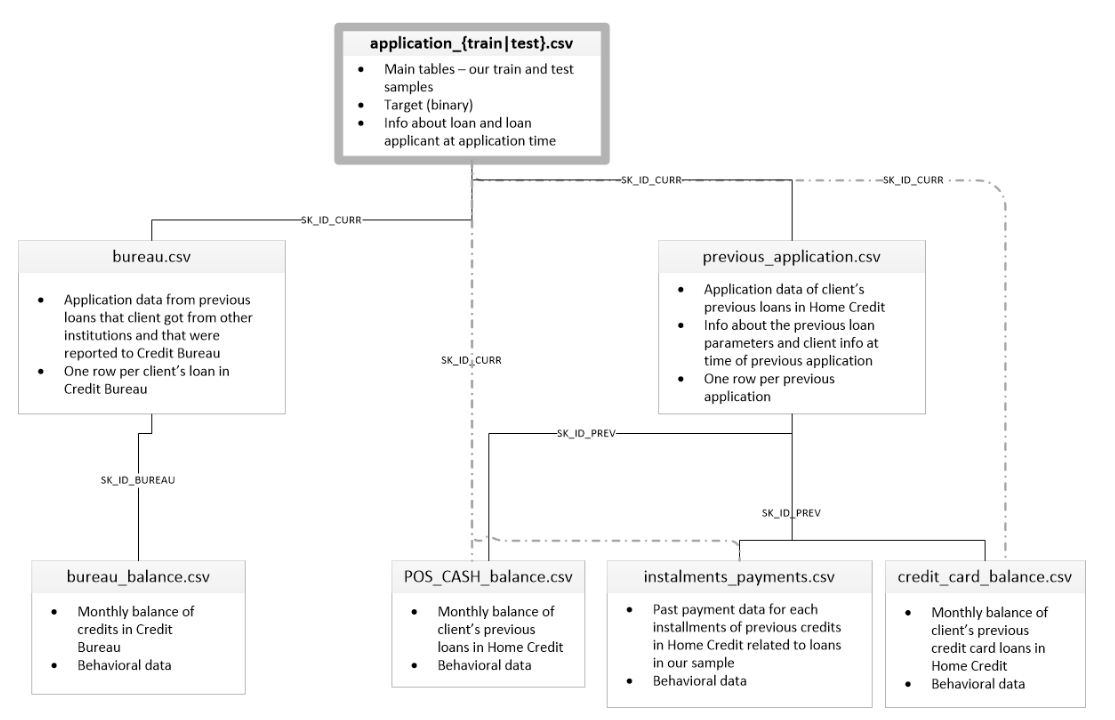

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('./application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
df.shape

(307511, 122)

In [9]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [10]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [11]:
pd.set_option('display.max_columns', None)
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
df.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

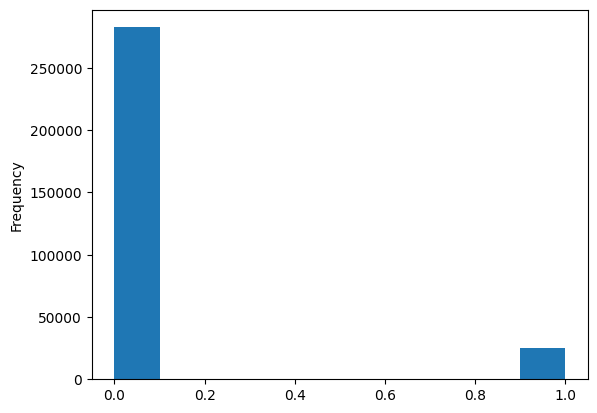

In [13]:
df.TARGET.astype(int).plot.hist();

In [14]:
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

In [15]:
print(f'Broj numerickih varijabli: {len(numerical_columns.columns)}')
print(f'Broj kategorickih varijabli: {len(categorical_columns.columns)}')

Broj numerickih varijabli: 106
Broj kategorickih varijabli: 16


In [16]:
categorical_columns.apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
pd.DataFrame(categorical_columns.apply(pd.Series.nunique, axis = 0), columns = ['NUnique']).sort_values(by = 'NUnique')

,NUnique
NAME_CONTRACT_TYPE,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
EMERGENCYSTATE_MODE,2
CODE_GENDER,3
HOUSETYPE_MODE,3
FONDKAPREMONT_MODE,4
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6


In [18]:
correlations = numerical_columns.corr()['TARGET'].sort_values()

print('Najpozitivnije korelacije:\n', correlations.tail(15))
print('\nNajnegativnije korelacije:\n', correlations.head(15))

Najpozitivnije korelacije:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Najnegativnije korelacije:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
RE

In [19]:
pd.DataFrame(correlations.tail())

,TARGET
DAYS_LAST_PHONE_CHANGE,0.055218
REGION_RATING_CLIENT,0.058899
REGION_RATING_CLIENT_W_CITY,0.060893
DAYS_BIRTH,0.078239
TARGET,1.000000


In [20]:
pd.DataFrame(correlations.head())

,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_EMPLOYED,-0.044932
FLOORSMAX_AVG,-0.044003


In [21]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])

-0.07823930830982694

In [22]:
def plot_numerical_distributions(df, numerical_columns, filename=None, n_cols = 3):
    num_rows = np.ceil(len(numerical_columns) / n_cols).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, n_cols, i)
        sns.histplot(df[col], kde=False, color='blue', bins=30)

        median_val = df[col].median()
        mean_val = df[col].mean()
        skewness_val = skew(df[col].dropna())

        plt.axvline(median_val, color='red', linestyle='--', label='Median')
        plt.axvline(mean_val, color='green', linestyle='-', label='Mean')

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Median: {median_val}, Mean: {mean_val}, Skewness: {skewness_val:.2f}')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

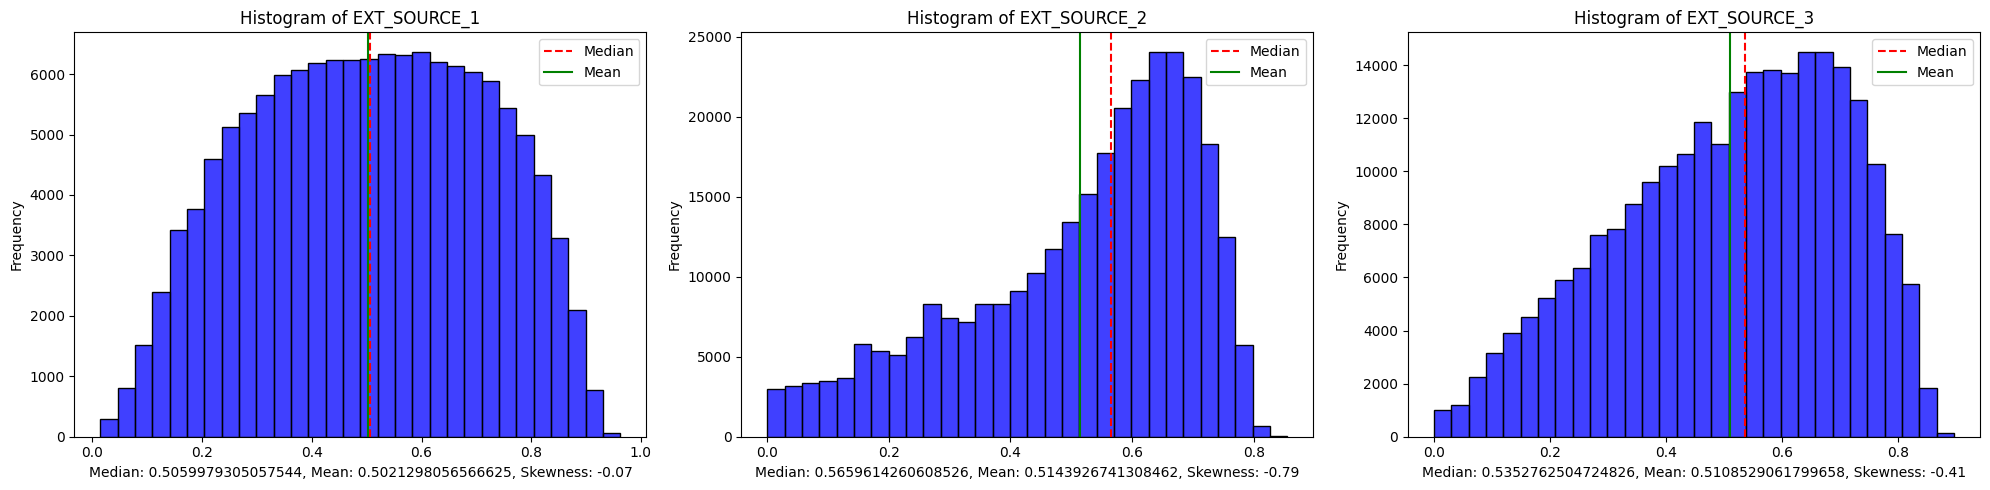

In [23]:
plot_numerical_distributions(df, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

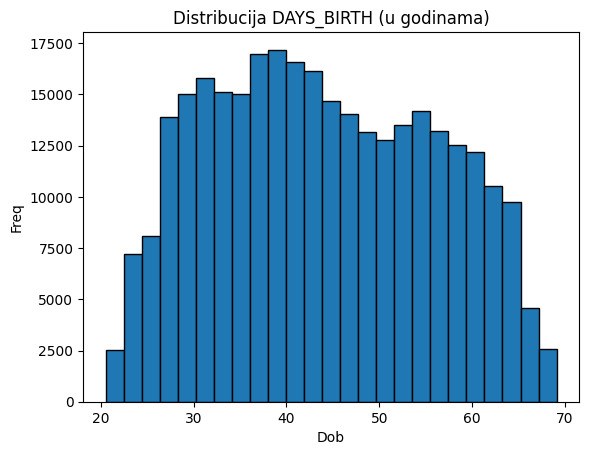

In [24]:
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Distribucija DAYS_BIRTH (u godinama)'); plt.xlabel('Dob'); plt.ylabel('Freq');

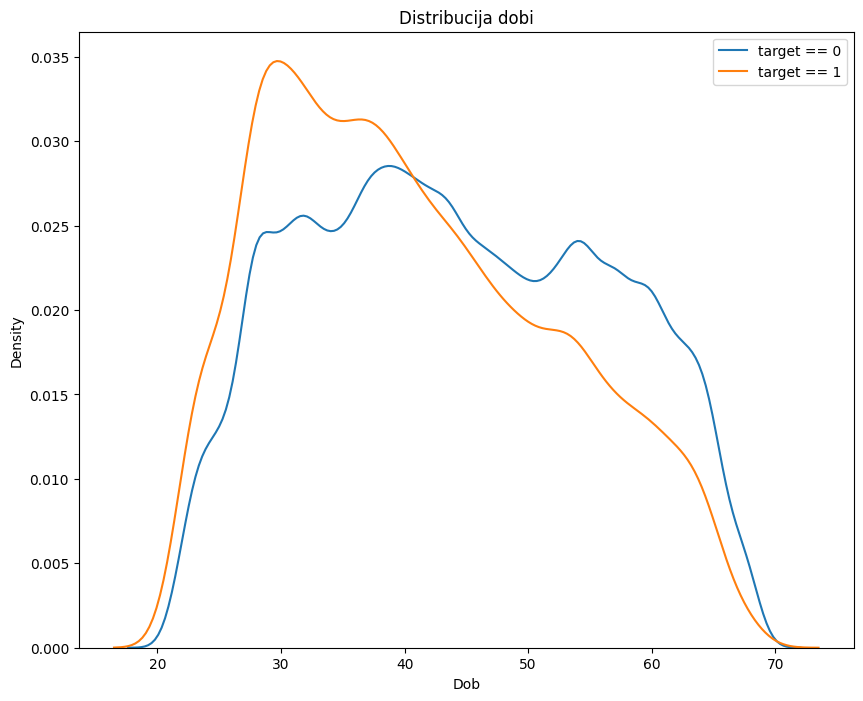

In [25]:
plt.figure(figsize = (10, 8))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Dob'); plt.ylabel('Density'); plt.title('Distribucija dobi'); plt.legend();

In [26]:
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

<ipython-input-26-c0e6ccde4ce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
<ipython-input-26-c0e6ccde4ce6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [27]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


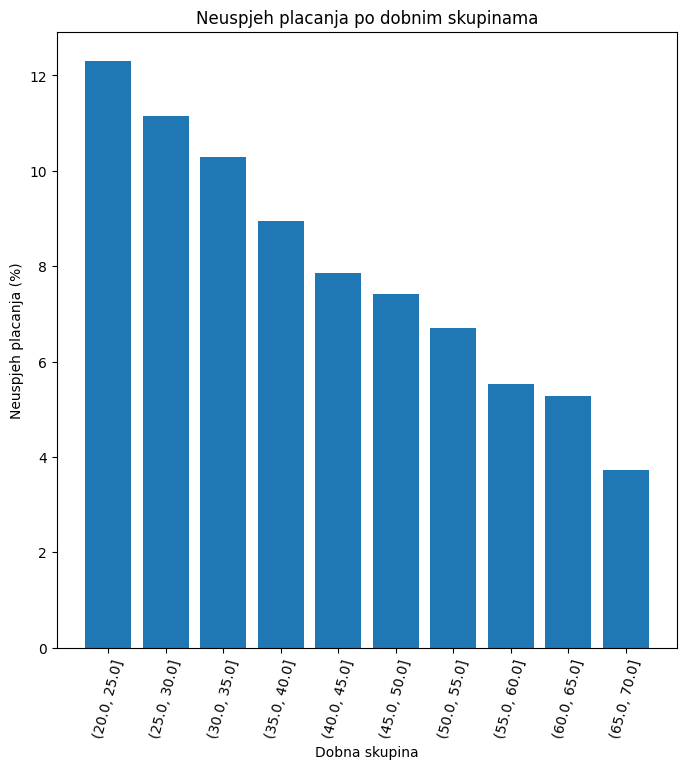

In [28]:
plt.figure(figsize = (8, 8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

plt.xticks(rotation = 75); plt.xlabel('Dobna skupina'); plt.ylabel('Neuspjeh placanja (%)')
plt.title('Neuspjeh placanja po dobnim skupinama');

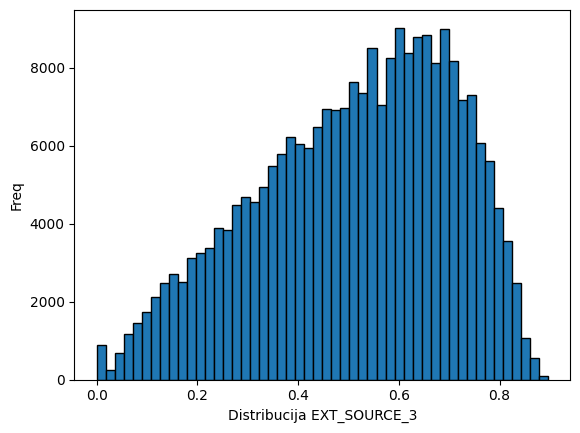

In [29]:
plt.hist(df['EXT_SOURCE_3'], edgecolor = 'k', bins = 50)
plt.title(''); plt.xlabel('Distribucija EXT_SOURCE_3'); plt.ylabel('Freq');

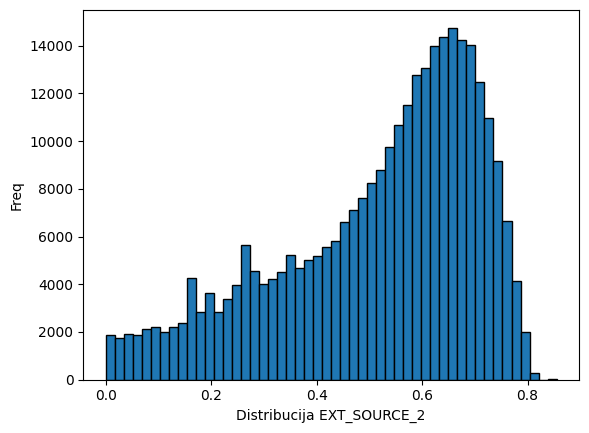

In [30]:
plt.hist(df['EXT_SOURCE_2'], edgecolor = 'k', bins = 50)
plt.title(''); plt.xlabel('Distribucija EXT_SOURCE_2'); plt.ylabel('Freq');

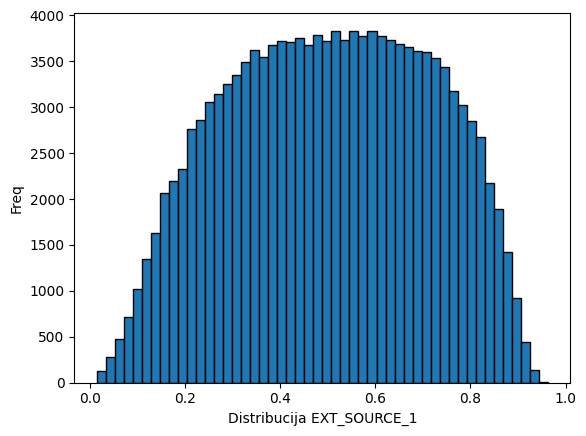

In [31]:
plt.hist(df['EXT_SOURCE_1'], edgecolor = 'k', bins = 50)
plt.title(''); plt.xlabel('Distribucija EXT_SOURCE_1'); plt.ylabel('Freq');

In [32]:
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


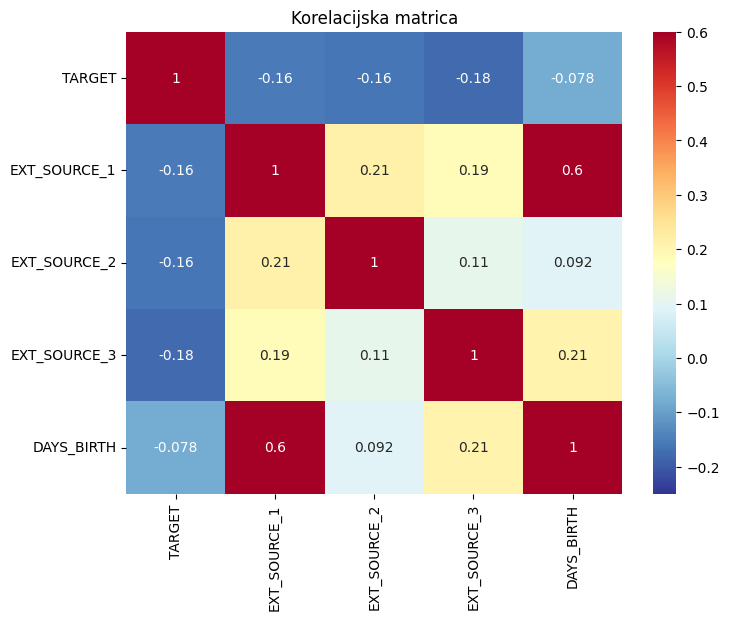

In [33]:
plt.figure(figsize = (8, 6))

sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Korelacijska matrica');

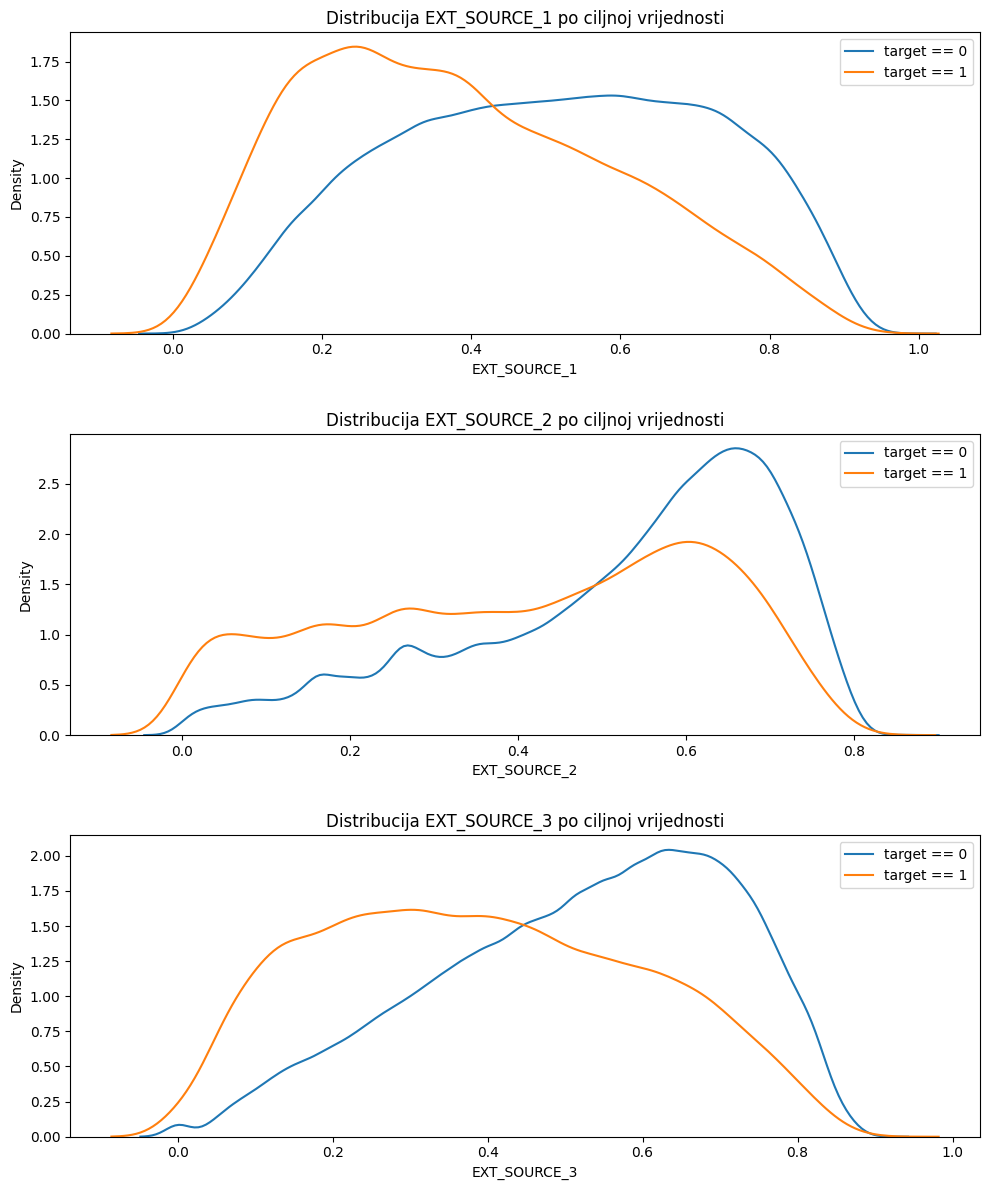

In [34]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i + 1)
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')

    plt.title('Distribucija %s po ciljnoj vrijednosti' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()

plt.tight_layout(h_pad = 2.5)

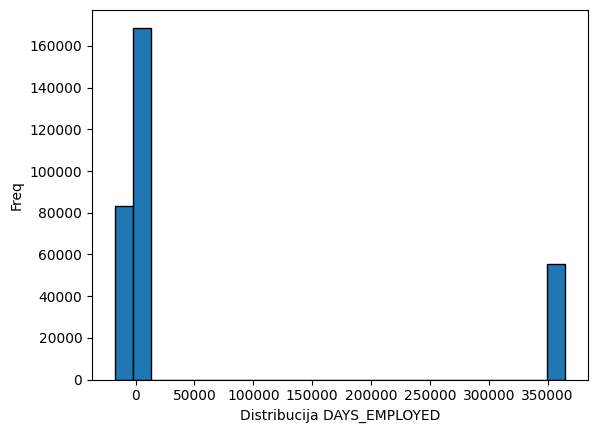

In [35]:
plt.hist(df['DAYS_EMPLOYED'], edgecolor = 'k', bins = 25)
plt.title(''); plt.xlabel('Distribucija DAYS_EMPLOYED'); plt.ylabel('Freq');

In [36]:
df['DAYS_EMPLOYED'].describe() # anomalija (~1000 godina radnog staza)

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

## Kategoricke

In [37]:
def plot_categorical_distributions(df, categorical_columns, filename=None):
    # categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    num_rows = np.ceil(len(categorical_columns) / 2).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.countplot(x=df[col], color='skyblue')

        mode_val = df[col].mode()[0]

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Mode: {mode_val}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

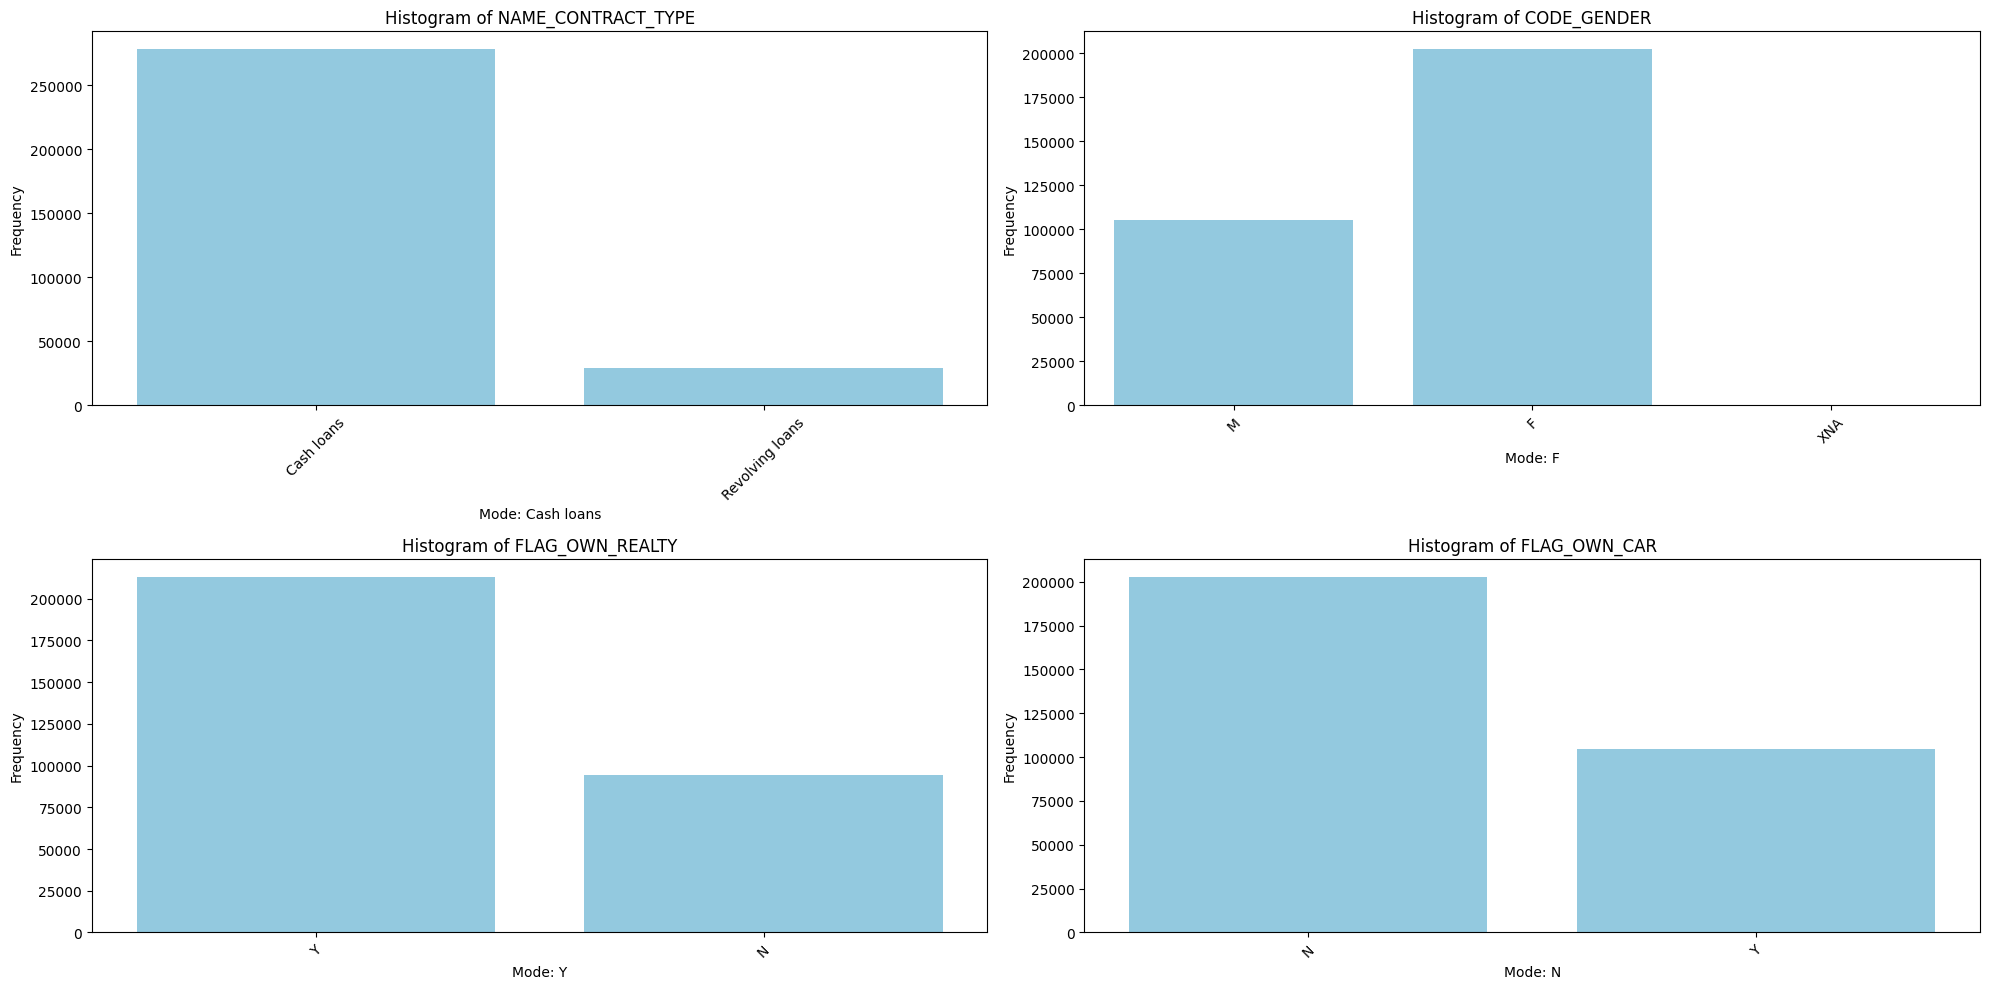

In [38]:
plot_categorical_distributions(df, ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR'])

In [39]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    n_classes = len(df1[feature].unique())
    palette = sns.color_palette("pastel", n_classes)

    if horizontal_layout:
        fig, ax1 = plt.subplots(figsize=(12, 6))
    else:
        fig, ax1 = plt.subplots(figsize=(12, 14))

    s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", hue=feature, data=df1, palette=palette, legend=False)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    plt.show()

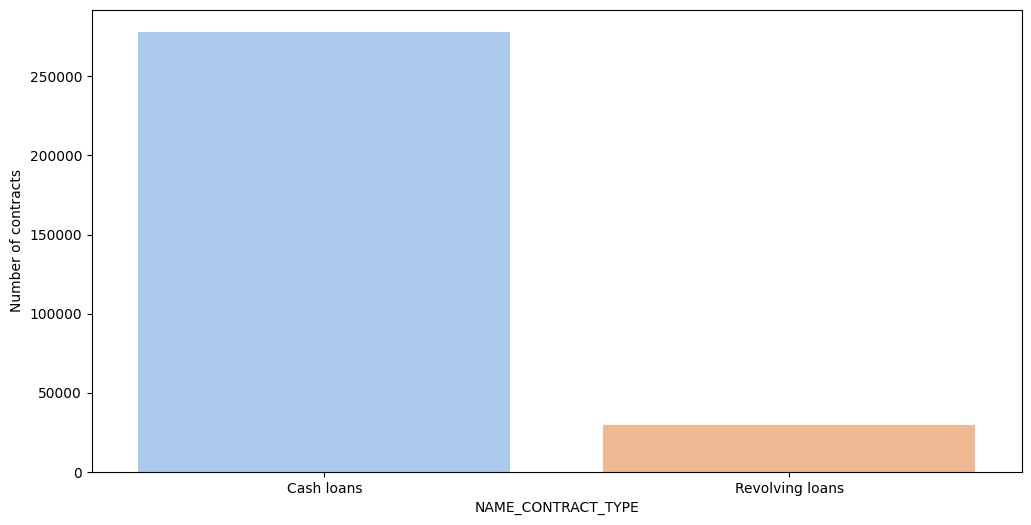

In [40]:
plot_stats('NAME_CONTRACT_TYPE')

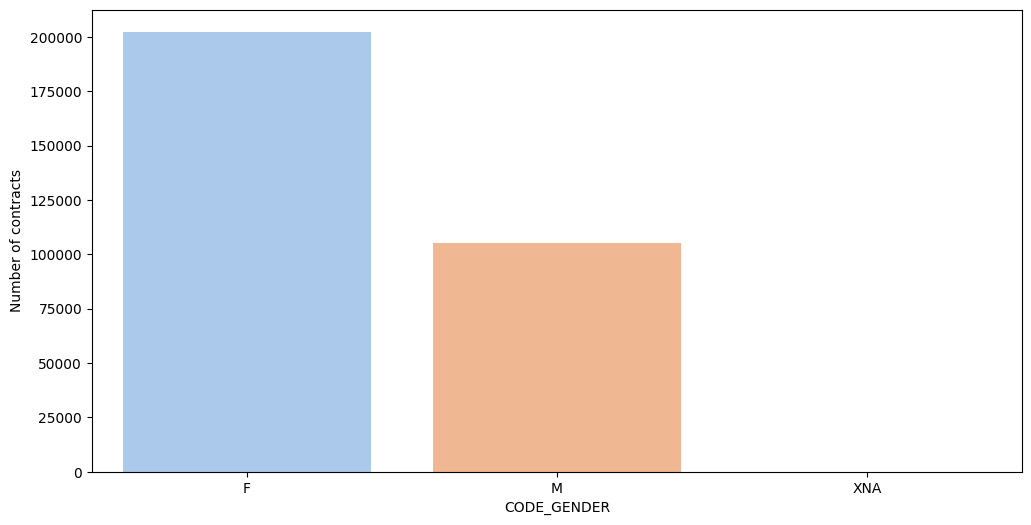

In [41]:
plot_stats('CODE_GENDER')

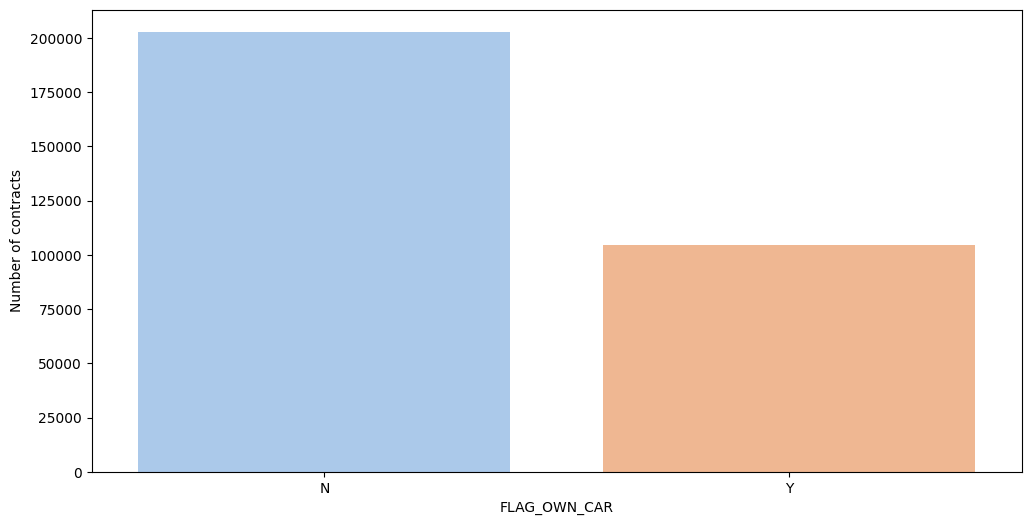

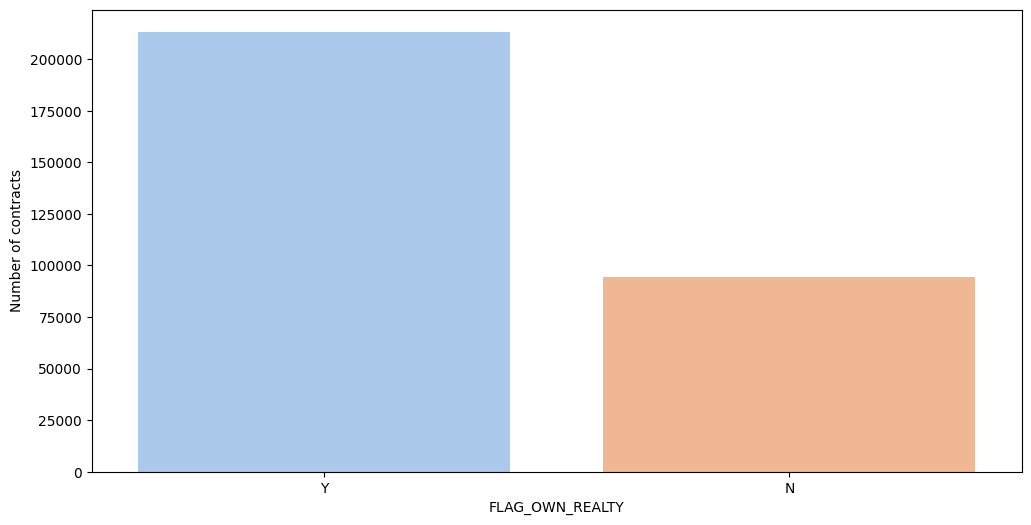

In [42]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

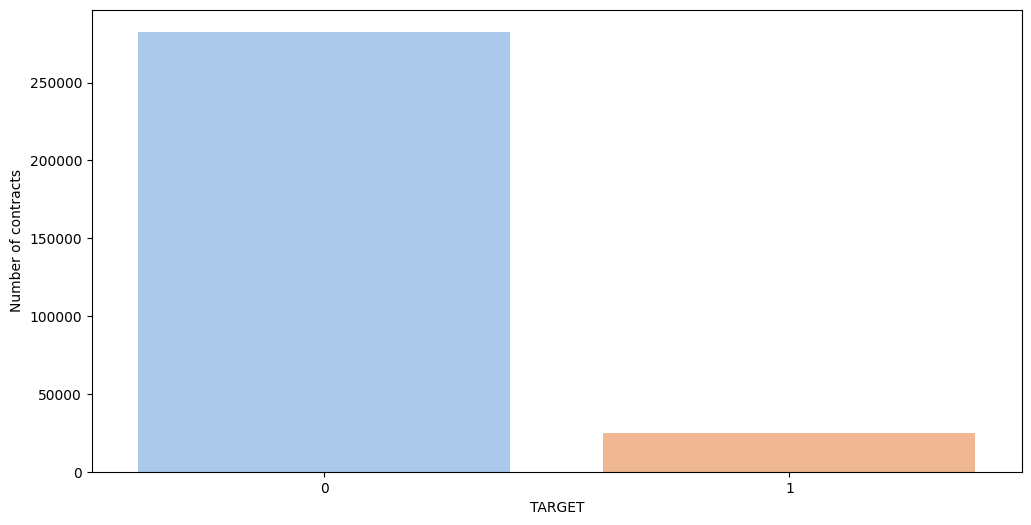

In [43]:
plot_stats('TARGET')

In [44]:
pd.set_option('display.max_rows', None)
missing = pd.DataFrame({'Missing': df.isna().sum(), 'Missing %': round(df.isna().sum() / len(df) * 100, 2)})
missing[missing.Missing != 0].sort_values(by = 'Missing %', ascending = False).head(20)

,Missing,Missing %
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
